## Fibonacci numbers

The Fibonacci numbers are defined recursively by the following difference equation:

\begin{equation}
\left\{
\begin{aligned}
    F_{n} & = F_{n-1} + F_{n-2} \\
    F_1 & = 1 \\
    F_0 & = 0 \\
\end{aligned}
\right.
\end{equation}

It is easy to compute the first few elements in the sequence:

$0, 1, 1, 2, 3, 5, 8, 13, 21, 34 \cdots $
<!-- PELICAN_END_SUMMARY -->

## Derivation of the general formula

It is possible to derive a general formula for $F_n$ without computing all the previous numbers in the sequence. If a gemetric series (i.e. a series with a constant ratio between consecutive terms $r^n$) is to solve the difference equation, we must have

\begin{aligned}
    r^n = r^{n-1} + r^{n-2} \\
\end{aligned}

which is equivalent to

\begin{aligned}
    r^2 = r + 1 \\
\end{aligned}

This equation has two unique solutions
\begin{aligned}
    \varphi = & \frac{1 + \sqrt{5}}{2} \approx 1.61803\cdots \\
    \psi = & \frac{1 - \sqrt{5}}{2} = 1 - \varphi = - {1 \over \varphi} \approx -0.61803\cdots \\
\end{aligned}

In particular the larger root is known as the _golden ratio_
\begin{align}
\varphi = \frac{1 + \sqrt{5}}{2} \approx 1.61803\cdots
\end{align}

Now, since both roots solve the difference equation for Fibonacci numbers, any linear combination of the two sequences also solves it

\begin{aligned}
    a \left(\frac{1 + \sqrt{5}}{2}\right)^n + b \left(\frac{1 - \sqrt{5}}{2}\right)^n \\
\end{aligned}

It's not hard to see that all Fibonacci numbers must be of this general form because we can uniquely solve for $a$ and $b$ such that the initial conditions of $F_1 = 1$ and $F_0 = 0$ are met

\begin{equation}
\left\{
\begin{aligned}
    F_0 = 0 = a \left(\frac{1 + \sqrt{5}}{2}\right)^0 + b \left(\frac{1 - \sqrt{5}}{2}\right)^0 \\
    F_1 = 1 = a \left(\frac{1 + \sqrt{5}}{2}\right)^1 + b \left(\frac{1 - \sqrt{5}}{2}\right)^1 \\
\end{aligned}
\right.
\end{equation}

yielding

\begin{equation}
\left\{
\begin{aligned}
    a = \frac{1}{\sqrt{5}} \\
    b = \frac{-1}{\sqrt{5}} \\
\end{aligned}
\right.
\end{equation}

We have therefore derived the general formula for the $n$-th Fibonacci number

\begin{aligned}
    F_n = \frac{1}{\sqrt{5}} \left(\frac{1 + \sqrt{5}}{2}\right)^n - \frac{1}{\sqrt{5}} \left(\frac{1 - \sqrt{5}}{2}\right)^n \\
\end{aligned}

Since the second term has an absolute value smaller than $1$, we can see that the ratios of Fibonacci numbers converge to the golden ratio

\begin{aligned}
    \lim_{n \rightarrow \infty} \frac{F_n}{F_{n-1}} = \frac{1 + \sqrt{5}}{2}
\end{aligned}

## Various implementations in Python

Writing a function in Python that outputs the $n$-th Fibonacci number seems simple enough. However even in this simple case one should be aware of some of the computational subtleties in order to avoid common pitfalls and improve efficiency.

### Common pitfall #1: inefficient recursion

Here's a very straight-forward recursive implementation 

In [1]:
import math
from __future__ import print_function

In [2]:
def fib_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)

In [3]:
print([fib_recursive(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


this seems to work fine, however the recursion overhead is actually very significant when $n$ is just slightly large. Here I'm computing $F_{34}$ and it takes more than 3 seconds! (on a 2013 model Macbook Air) 

In [4]:
%timeit fib_recursive(34)

1 loops, best of 3: 3.58 s per loop


The overhead incurred by creating a large number of stack frames is tremendous. Python by default does not perform what's known as tail recursion elimination http://stackoverflow.com/questions/13543019/why-is-recursion-in-python-so-slow, and therefore this is a very inefficient implemenation. In contrast, if we have an iterative implementation, the speed is dramatically faster

In [5]:
def fib_iterative(n):
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
    return a

In [6]:
%timeit fib_iterative(34)

100000 loops, best of 3: 4.59 µs per loop


Now, let's see if we can make it even faster by eliminating the loop altogether and just go straight to the general formula we derived earlier

In [7]:
def fib_formula(n):
    golden_ratio = (1 + math.sqrt(5)) / 2
    val = (golden_ratio**n - (1 - golden_ratio)**n) / math.sqrt(5)
    return int(round(val))

In [8]:
%timeit fib_formula(34)

1000000 loops, best of 3: 1.36 µs per loop


Even faster, great! And since we are not looping anymore, we should expect to see the computation time to scale better as $n$ increases. That's indeed what we see:

In [9]:
import pandas as pd
import numpy as np

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(15, 5)

In [11]:
elapsed = {}
elapsed['iterative'] = {}
elapsed['formula'] = {}
for i in range(34):
    result = %timeit -n 10000 -q -o fib_iterative(i)
    elapsed['iterative'][i] = result.best
    result = %timeit -n 10000 -q -o fib_formula(i)
    elapsed['formula'][i] = result.best

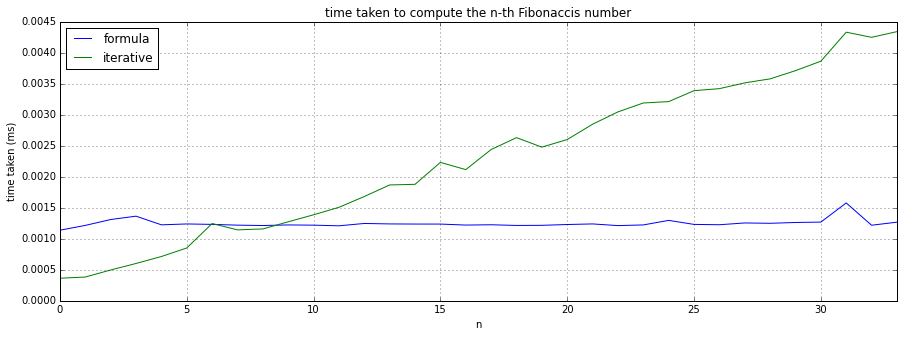

In [12]:
elapased_ms = pd.DataFrame(elapsed) * 1000
elapased_ms.plot(title='time taken to compute the n-th Fibonaccis number')
plt.ylabel('time taken (ms)')
plt.xlabel('n')

Indeed as we expect, the iterative approach scales linearly, while the formula approach is basically constant time.

However we need to be careful with using a numerical formula like this for getting integer results. 

### Common pitfall #2: numerical precision

Here we compare the actual values obtained by `fib_iterative()` and `fib_formula()`. Notice that it does not take a very large `n` for us to run into numerical precision issues.

When `n` is 71 we are starting to get different results from the two implementations!

In [13]:
df = {}
df['iterative'] = {}
df['formula'] = {}
df['diff'] = {}

for i in range(100):
    df['iterative'][i] = fib_iterative(i)
    df['formula'][i] = fib_formula(i)
    df['diff'][i] = df['formula'][i] - df['iterative'][i]
df = pd.DataFrame(df, columns=['iterative', 'formula', 'diff'])
df.index.name = 'n-th Fibonacci'
df.ix[68:74]

,iterative,formula,diff
n-th Fibonacci,,,
68,72723460248141,72723460248141,0
69,117669030460994,117669030460994,0
70,190392490709135,190392490709135,0
71,308061521170129,308061521170130,1
72,498454011879264,498454011879265,1
73,806515533049393,806515533049395,2
74,1304969544928657,1304969544928660,3


You can see that `fib_iterative()` produces the correct result by eyeballing the sum of $F_{69}$ and $F_{70}$, while `fib_formual()` starts to have precision errors as the number gets larger. So, be mindful with precision issues when doing numerical computing. Here's a nice article on this topic http://www.codeproject.com/Articles/25294/Avoiding-Overflow-Underflow-and-Loss-of-Precision

Also notice that unlike C/C++, in Python there's technically no limit in the precision of its integer representation. In Python 2 any overflowing operation on `int` is automatically converted into `long`, and `long` has arbitrary precision. In Python 3 it is just `int`. More information on Python's arbitrary-precision integers can be found here  http://stackoverflow.com/questions/9860588/maximum-value-for-long-integer